# Task 1

$$
H_0 = a_0 = 0.7\\
H_1 \neq 0.7\\
t(x_1, ..., x_n) = \frac{\sqrt{n}(\overline{x} - a_0)}{\tilde{s}} \simeq t(n - 1)\\
$$

Sample: 80 from 100 are 1, other 20 are 0.

I will change $\alpha$ to find the border value to reject $H_0$.

Confidence interval is central and symmetrical, borders are quantiles for given $\alpha$.

In [1]:
def criterion_value(a0, sample):
    a = mean(sample)
    s = s_asymptotic(sample)
    n = len(sample)
    return (n**(1/2)) * (a - a0) / s

def s_asymptotic(sample):
    a = mean(sample)
    sum_squares = sum([(elem - a)**2 for elem in sample])
    return (sum_squares / (len(sample) - 1)) ** (1/2)

def mean(sample):
    return sum(sample) / len(sample)

sample = [0 for i in range(20)] + [1 for i in range(80)]

a0 = 0.7

criterion_value(a0, sample)

2.487468592766557

In [2]:
from scipy.stats import t
import numpy as np

In [3]:
def is_in_conf_interval(criterion, conf_interval):
    return conf_interval[0] <= criterion <= conf_interval[1]

def confidence_interval(n, alpha):
    
    return t(df = n - 1).ppf((alpha, 1 - alpha))

def check_hypothesis(sample, a0, arange, debug = True):
    n = len(sample)
    criterion = criterion_value(a0, sample)
    if (debug):
        print(criterion)
    res = [0 for i in arange]
    for i in range(len(arange)):
        alpha = arange[i]
        conf_interval = confidence_interval(n, alpha)
        answer = is_in_conf_interval(criterion, conf_interval)
        if (debug):
            print(alpha)
            print(conf_interval)
            print(answer)
        res[i] = answer
    return res

check_hypothesis(sample, a0, np.arange(0.0, 1.1, 0.1))

2.487468592766557
0.0
[-inf  inf]
True
0.1
[-1.29016144  1.29016144]
False
0.2
[-0.84526703  0.84526703]
False
0.30000000000000004
[-0.52609324  0.52609324]
False
0.4
[-0.25402901  0.25402901]
False
0.5
[6.65477341e-17 6.65477341e-17]
False
0.6000000000000001
[ 0.25402901 -0.25402901]
False
0.7000000000000001
[ 0.52609324 -0.52609324]
False
0.8
[ 0.84526703 -0.84526703]
False
0.9
[ 1.29016144 -1.29016144]
False
1.0
[ inf -inf]
False


[True, False, False, False, False, False, False, False, False, False, False]

In [4]:
check_hypothesis(sample, a0, np.arange(0.0, 0.1, 0.01))

2.487468592766557
0.0
[-inf  inf]
True
0.01
[-2.36460586  2.36460586]
False
0.02
[-2.08116154  2.08116154]
False
0.03
[-1.90259013  1.90259013]
False
0.04
[-1.76884234  1.76884234]
False
0.05
[-1.66039116  1.66039116]
False
0.06
[-1.56830857  1.56830857]
False
0.07
[-1.4877316  1.4877316]
False
0.08
[-1.41570578  1.41570578]
False
0.09
[-1.3502957  1.3502957]
False


[True, False, False, False, False, False, False, False, False, False]

In [5]:
check_hypothesis(sample, a0, np.arange(0.0, 0.01, 0.001))

2.487468592766557
0.0
[-inf  inf]
True
0.001
[-3.17460384  3.17460384]
True
0.002
[-2.94712597  2.94712597]
True
0.003
[-2.80832311  2.80832311]
True
0.004
[-2.70690903  2.70690903]
True
0.005
[-2.62640546  2.62640546]
True
0.006
[-2.55934321  2.55934321]
True
0.007
[-2.50168237  2.50168237]
True
0.008
[-2.45098324  2.45098324]
False
0.009000000000000001
[-2.40565613  2.40565613]
False


[True, True, True, True, True, True, True, True, False, False]

I believe that there must be really small significant level, so we can reject $H_0$ with standart $\alpha = 0.05$ or even $0.01$

The next question is: What if 740 out of 1000 patients in the test group recovered after one week?

In [6]:
sample = [0 for i in range(1000 - 740)] + [1 for i in range(740)]

check_hypothesis(sample, a0, np.arange(0.0, 1.1, 0.1))

2.8823067684915764
0.0
[-inf  inf]
True
0.1
[-1.28239957  1.28239957]
False
0.2
[-0.84198118  0.84198118]
False
0.30000000000000004
[-0.52456787  0.52456787]
False
0.4
[-0.25341458  0.25341458]
False
0.5
[6.63965128e-17 6.63965128e-17]
False
0.6000000000000001
[ 0.25341458 -0.25341458]
False
0.7000000000000001
[ 0.52456787 -0.52456787]
False
0.8
[ 0.84198118 -0.84198118]
False
0.9
[ 1.28239957 -1.28239957]
False
1.0
[ inf -inf]
False


[True, False, False, False, False, False, False, False, False, False, False]

In [7]:
check_hypothesis(sample, a0, np.arange(0.0, 0.1, 0.01))

2.8823067684915764
0.0
[-inf  inf]
True
0.01
[-2.33008642  2.33008642]
False
0.02
[-2.05643407  2.05643407]
False
0.03
[-1.88293161  1.88293161]
False
0.04
[-1.75246875  1.75246875]
False
0.05
[-1.64638035  1.64638035]
False
0.06
[-1.55610437  1.55610437]
False
0.07
[-1.47696565  1.47696565]
False
0.08
[-1.40611815  1.40611815]
False
0.09
[-1.34169438  1.34169438]
False


[True, False, False, False, False, False, False, False, False, False]

In [8]:
check_hypothesis(sample, a0, np.arange(0.0, 0.01, 0.001))

2.8823067684915764
0.0
[-inf  inf]
True
0.001
[-3.09841036  3.09841036]
True
0.002
[-2.88486291  2.88486291]
True
0.003
[-2.7536726  2.7536726]
False
0.004
[-2.65741153  2.65741153]
False
0.005
[-2.58075964  2.58075964]
False
0.006
[-2.51674837  2.51674837]
False
0.007
[-2.4615986  2.4615986]
False
0.008
[-2.41302319  2.41302319]
False
0.009000000000000001
[-2.36952918  2.36952918]
False


[True, True, True, False, False, False, False, False, False, False]

For 740 cured from 1000 $H_0$ can also be rejected with $\alpha = 0.05$ or even $0.01$, it works for $\alpha = 0.003$.

This happens because our sample size has grown.

If the mean = 0.74 and sample size still be 100 we wouldn't reject $H_0$ for about $\alpha = 0.18$.

In [9]:
sample = [0 for i in range(100 - 74)] + [1 for i in range(74)]
check_hypothesis(sample, a0, np.arange(0.0, 0.1, 0.01))

0.9073504412765924
0.0
[-inf  inf]
True
0.01
[-2.36460586  2.36460586]
True
0.02
[-2.08116154  2.08116154]
True
0.03
[-1.90259013  1.90259013]
True
0.04
[-1.76884234  1.76884234]
True
0.05
[-1.66039116  1.66039116]
True
0.06
[-1.56830857  1.56830857]
True
0.07
[-1.4877316  1.4877316]
True
0.08
[-1.41570578  1.41570578]
True
0.09
[-1.3502957  1.3502957]
True


[True, True, True, True, True, True, True, True, True, True]

In [10]:
check_hypothesis(sample, a0, np.arange(0.1, 0.2, 0.01))

0.9073504412765924
0.1
[-1.29016144  1.29016144]
True
0.11
[-1.23433514  1.23433514]
True
0.12
[-1.18209374  1.18209374]
True
0.13
[-1.13288209  1.13288209]
True
0.13999999999999999
[-1.08626414  1.08626414]
True
0.14999999999999997
[-1.04189076  1.04189076]
True
0.15999999999999998
[-0.99947776  0.99947776]
True
0.16999999999999998
[-0.95879052  0.95879052]
True
0.17999999999999997
[-0.91963284  0.91963284]
True
0.18999999999999995
[-0.88183888  0.88183888]
False


[True, True, True, True, True, True, True, True, True, False]

# Task 2

In [11]:
from numpy.random import normal

In [12]:
def generate_sample(n, a):
    return normal(a, 1, n)

generate_sample(10, a0)

array([ 1.02532159,  1.01469132,  1.80866559,  2.31804366,  1.22046624,
       -0.2275119 , -0.85325158, -1.26007886, -0.12380698,  1.03515767])

In [13]:
def check_hypothesis2(sample, a0, alpha, debug = True):
    n = len(sample)
    criterion = criterion_value(a0, sample)
    if (debug):
        print(criterion)
    conf_interval = confidence_interval(n, alpha)
    answer = is_in_conf_interval(criterion, conf_interval)
    if (debug):
        print(alpha)
        print(conf_interval)
        print(answer)
    return answer

check_hypothesis2(sample, a0, 0.5)

0.9073504412765924
0.5
[6.65477341e-17 6.65477341e-17]
False


False

In [14]:
m = 100
n = 100
a0 = 0.7

def a1_error_for_alpha(m, n, a0, alpha):
    res = [0 for i in range(m)]
    for i in range(m):
        sample = generate_sample(n, a0)
        res[i] = int(check_hypothesis2(sample, a0, alpha, False))
    return 1 - sum(res)/m

a1_error_for_alpha(m, n, a0, 0.1)

0.27

In [15]:
def check_alpha_dependency_a1_error():
    alphas = np.arange(0, 1, 0.05)
    res = {}
    for alpha in alphas:
        res[alpha] = a1_error_for_alpha(m, n, a0, alpha)
    return res

dots = check_alpha_dependency_a1_error()

In [16]:
import matplotlib.pyplot as plt

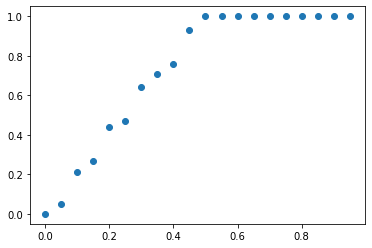

In [17]:
xs = dots.keys()
ys = [dots[i] for i in xs]
plt.scatter(xs, ys)

In [18]:
a1 = 0.85

def a2_error_for_alpha(m, n, a0, a1, alpha):
    res = [0 for i in range(m)]
    for i in range(m):
        sample = generate_sample(n, a1)
        res[i] = int(check_hypothesis2(sample, a0, alpha, False))
    return sum(res)/m

a2_error_for_alpha(m, n, a0, a1, 0.01)

0.76

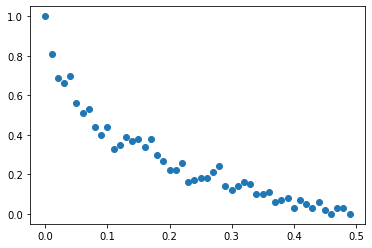

In [19]:
def check_alpha_dependency_a2_error():
    alphas = np.arange(0, 0.5, 0.01)
    res = {}
    for alpha in alphas:
        res[alpha] = a2_error_for_alpha(m, n, a0, a1, alpha)
    return res

dots = check_alpha_dependency_a2_error()

xs = dots.keys()
ys = [dots[i] for i in xs]
plt.scatter(xs, ys)

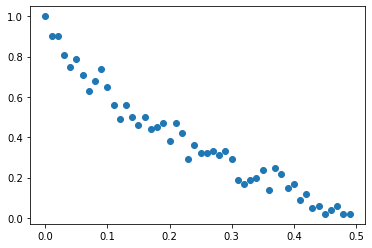

In [20]:
a1 = 0.8

dots = check_alpha_dependency_a2_error()

xs = dots.keys()
ys = [dots[i] for i in xs]
plt.scatter(xs, ys)

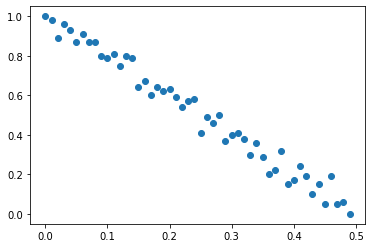

In [21]:
a1 = 0.7

dots = check_alpha_dependency_a2_error()

xs = dots.keys()
ys = [dots[i] for i in xs]
plt.scatter(xs, ys)

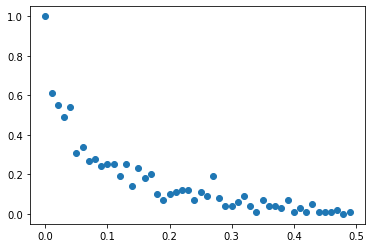

In [22]:
a1 = 0.9

dots = check_alpha_dependency_a2_error()

xs = dots.keys()
ys = [dots[i] for i in xs]
plt.scatter(xs, ys)

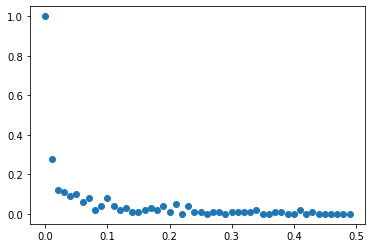

In [23]:
a1 = 1

dots = check_alpha_dependency_a2_error()

xs = dots.keys()
ys = [dots[i] for i in xs]
plt.scatter(xs, ys)

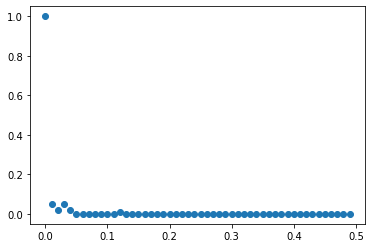

In [24]:
a1 = 0.3

dots = check_alpha_dependency_a2_error()

xs = dots.keys()
ys = [dots[i] for i in xs]
plt.scatter(xs, ys)